[2024-12-06 Fiddler](https://thefiddler.substack.com/p/can-you-squeeze-the-particles-into)
====================

Fiddler
-------

Intuitively, the particles have to be as far apart as possible, so put one of them in a
corner, and the other two on the edges flanking the opposite corner, and I expect symmetry
about the diagonal joining the corner and the opposite corner.  That makes for a single
parameter: the position of the two particles on the edge.

Let $x$ be the distance of the two particles along the edge from the opposite corner.  The
energy is

In [1]:
E_a(x) = 2/sqrt((1-x)^2 + 1) + 1/(x*sqrt(2))

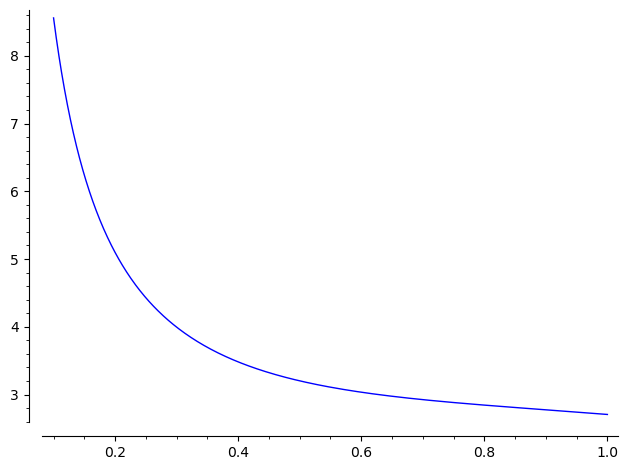

In [2]:
plot(E_a,x,0.1,1)

It looks the minimum is when the particles are in 3 corners.  But consider two particles
in adjacent corners, and the third on the opposite side.

In [3]:
E_b(x) = 1 + 1/sqrt(1+x^2) + 1/sqrt(1+(1-x)^2)

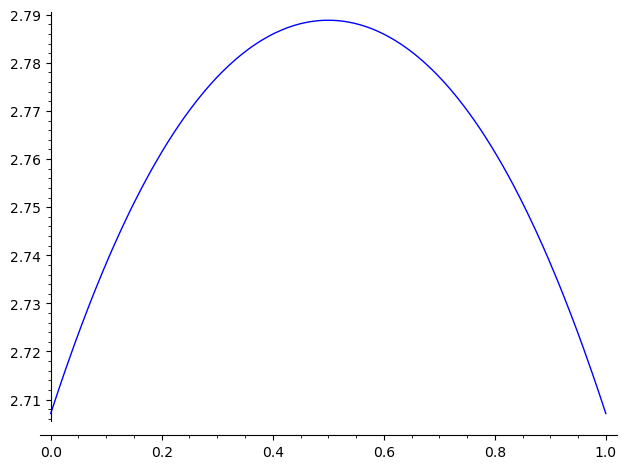

In [4]:
plot(E_b,x,0,1)

In [5]:
show((E_a(1),E_b(0),E_b(1)))

(1/2*sqrt(2) + 2, 1/2*sqrt(2) + 2, 1/2*sqrt(2) + 2)

So the minimum energy is $2+1/\sqrt2$, when each particle is in a different corner.

In [6]:
E_3(x1,y1,x2,y2,x3,y3) = (1/sqrt((x1-x2)^2+(y1-y2)^2) + 1/sqrt((x1-x3)^2+(y1-y3)^2) 
                          + 1/sqrt((x2-x3)^2+(y2-y3)^2))

In [7]:
E_3(0,0,0,1,1,0)

1/2*sqrt(2) + 2

The contour plots of the energy all the particles except one are fixed at
corners shows that the minimum energy is when the last particle is in an
unoccupied corner.

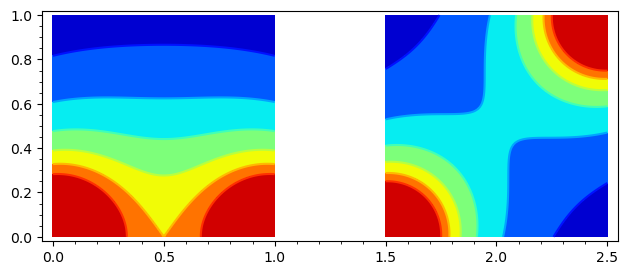

In [8]:
(contour_plot(min_symbolic(6,E_3(0,0,1,0,x3,y3)),(x3,0,1),(y3,0,1),cmap='jet')
 + contour_plot(min_symbolic(6,E_3(0,0,1,1,x3-1.5,y3)),(x3,1.5,2.5),(y3,0,1),cmap='jet'))

In [9]:
minimize_constrained(E_3,[(0,1)]*6,(0.1,0.1,0.4,0.6,0.8,0.9))

(0.0, 0.0, 0.0, 1.0, 1.0, 1.0)

Extra credit
------------

Intuitively, I'd think a the particles form a square lattice, with 4 in the corners,
4 in the middle of each side, and 1 in the middle.  At least, I can analytically check
if this is local minimum by perturbing a corner particle, an edge particle, and the
center particle.  However, based on the Fiddler result, maybe putting a particle in the
middle is a local maximum, and the minimum has all the particles along the edges, and
probably in all the corners.

In [10]:
x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9 = var(
    'x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9')
p = [(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x5,y5),(x6,y6),(x7,y7),(x8,y8),(x9,y9)]
E_9(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9) = sum(
    [0 if i >= j else 1/sqrt((p[i][0]-p[j][0])^2+(p[i][1]-p[j][1])^2) for j in [0..8] for i in [0..8]])

In [11]:
minimize_constrained(E_9,[(0,1)]*18,
                     [0,0,1/2,0,1,0,
                      0,1/2,1/2,1/2,1,1/2,
                      0,1,1/2,1,1,1])

(0.0, 0.0, 0.5, 0.0, 1.0, 0.0, 0.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.0, 1.0, 0.5, 1.0, 1.0, 1.0)

In [12]:
a = E_9(0,0,1/2,0,1,0,0,1/2,1/2,1/2,1,1/2,0,1,1/2,1,1,1)
show(a,LatexExpr('\\approx'),numerical_approx(a))

16/5*sqrt(5) + sqrt(2) + 16*sqrt(1/2) + 30 \approx 49.8833395893572

In [13]:
def t(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9):
    x,y = var('x,y')
    return (text(f"E≈{numerical_approx(E_9(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9))}",
                 (2,2.75),axes=false,color='black')
            + contour_plot(min_symbolic(60,E_9(x,y,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9)),(x,0,1),(y,0,1),cmap='jet')
            + contour_plot(min_symbolic(60,E_9(x1,y1,x-1.5,y,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9)),(x,1.5,2.5),(y,0,1),cmap='jet')
            + contour_plot(min_symbolic(60,E_9(x1,y1,x2,y2,x-3,y,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9)),(x,3,4),(y,0,1),cmap='jet')
            + contour_plot(min_symbolic(60,E_9(x1,y1,x2,y2,x3,y3,x,y-1.5,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9)),(x,0,1),(y,1.5,2.5),cmap='jet')
            + contour_plot(min_symbolic(60,E_9(x1,y1,x2,y2,x3,y3,x4,y4,x-1.5,y-1.5,x6,y6,x7,y7,x8,y8,x9,y9)),(x,1.5,2.5),(y,1.5,2.5),cmap='jet')
            + contour_plot(min_symbolic(60,E_9(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x-3,y-1.5,x7,y7,x8,y8,x9,y9)),(x,3,4),(y,1.5,2.5),cmap='jet')
            + contour_plot(min_symbolic(60,E_9(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x,y-3,x8,y8,x9,y9)),(x,0,1),(y,3,4),cmap='jet')
            + contour_plot(min_symbolic(60,E_9(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x-1.5,y-3,x9,y9)),(x,1.5,2.5),(y,3,4),cmap='jet')
            + contour_plot(min_symbolic(60,E_9(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x-3,y-3)),(x,3,4),(y,3,4),cmap='jet')
            + sum([circle((x1+dx,y1+dy),0.05,color='black',alpha=0.2,fill=true)
                   + circle((x2+dx,y2+dy),0.05,color='black',alpha=0.2,fill=true)
                   + circle((x3+dx,y3+dy),0.05,color='black',alpha=0.2,fill=true)
                   + circle((x4+dx,y4+dy),0.05,color='black',alpha=0.2,fill=true)
                   + circle((x5+dx,y5+dy),0.05,color='black',alpha=0.2,fill=true)
                   + circle((x6+dx,y6+dy),0.05,color='black',alpha=0.2,fill=true)
                   + circle((x7+dx,y7+dy),0.05,color='black',alpha=0.2,fill=true)
                   + circle((x8+dx,y8+dy),0.05,color='black',alpha=0.2,fill=true)
                   + circle((x9+dx,y9+dy),0.05,color='black',alpha=0.2,fill=true)
                   for dx in [0,1.5,3] for dy in [0,1.5,3]])
           )


Contour plots of the energy when moving one of the particles around the square,
holding the other 8 fixed in the lattice:

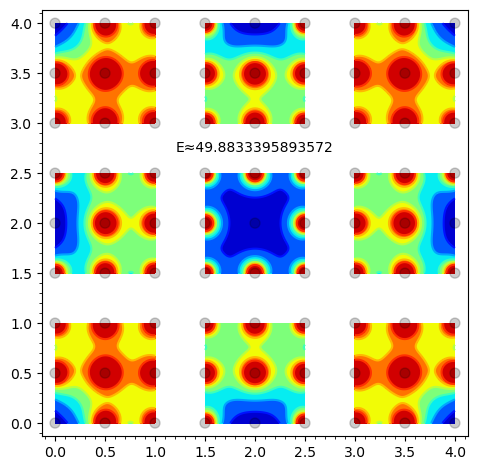

In [14]:
t(0,0,1/2,0,1,0,0,1/2,1/2,1/2,1,1/2,0,1,1/2,1,1,1)

Considering all the particles along the edges,

In [15]:
minimize_constrained(E_9,[(0,1)]*18,
                     [0,0,1/3,0,2/3,0,1,0,
                      0,1/2,1,1/2,
                      0,1,1/2,1,1,1])

(0.0, 0.0, 0.31895559609617363, 0.0, 0.6810444061345252, 0.0, 1.0, 0.0, 0.0, 0.546908068590384, 1.0, 0.5469080681651033, 0.0, 1.0, 0.4999999999029509, 1.0, 1.0, 1.0)

In [16]:
E_9(0.0, 0.0, 0.31895559609617363, 0.0, 0.6810444061345252, 0.0, 1.0, 0.0, 0.0, 0.546908068590384, 1.0, 0.5469080681651033, 0.0, 1.0, 0.4999999999029509, 1.0, 1.0, 1.0)

49.7586702759104

And contour plots of the energy when moving one of particles around the square,

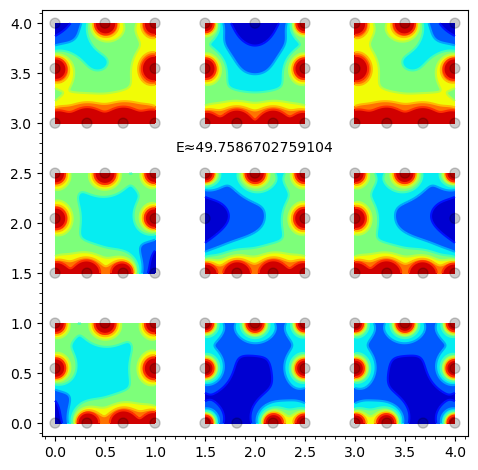

In [17]:
t(0.0, 0.0, 0.31895559609617363, 0.0, 0.6810444061345252, 0.0, 1.0, 0.0, 0.0, 0.546908068590384, 1.0, 0.5469080681651033, 0.0, 1.0, 0.4999999999029509, 1.0, 1.0, 1.0)

So it looks like having a particle in the center is a local minimum, but the global minimum has
all the particles on the edge, with four of them in the corners.

In [18]:
E(x,y) = E_9(0,0,x,0,1-x,0,1,0,0,y,1,y,0,1,1/2,1,1,1)
show(E)

(x, y) |--> 4/5*sqrt(5) + sqrt(2) + 4/sqrt((2*x - 1)^2 + 4) + 1/sqrt((2*x - 1)^2) + 2/sqrt((x - 1)^2 + y^2) + 2/sqrt((x - 1)^2 + 1) + 2/sqrt((x - 1)^2) + 2/sqrt(x^2 + y^2) + 2/sqrt(x^2 + 1) + 2/sqrt(x^2) + 4/sqrt(4*(y - 1)^2 + 1) + 2/sqrt((y - 1)^2 + 1) + 2/sqrt((y - 1)^2) + 2/sqrt(y^2 + 1) + 2/sqrt(y^2) + 9

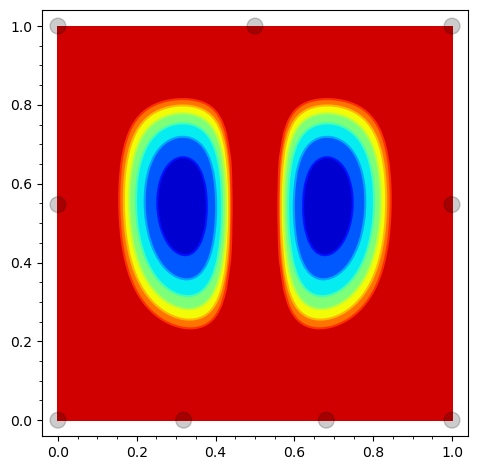

In [19]:
(contour_plot(min_symbolic(55,E(x,y)),(x,0,1),(y,0,1),cmap='jet')
 + circle((0,0),0.02,color='black',fill=true,alpha=0.2)
 + circle((0.319,0),0.02,color='black',fill=true,alpha=0.2)
 + circle((0.681,0),0.02,color='black',fill=true,alpha=0.2)
 + circle((1,0),0.02,color='black',fill=true,alpha=0.2)
 + circle((0,0.547),0.02,color='black',fill=true,alpha=0.2)
 + circle((1,0.547),0.02,color='black',fill=true,alpha=0.2)
 + circle((0,1),0.02,color='black',fill=true,alpha=0.2)
 + circle((0.5,1),0.02,color='black',fill=true,alpha=0.2)
 + circle((1,1),0.02,color='black',fill=true,alpha=0.2)
)

In [20]:
solve(derivative(E(x,y),y)==0,y)

[y == (8*(x^2 + y^2 - 2*x + 1)^(3/2)*(y^2 - 2*y + 2)^(3/2)*(y^2 - 2*y + 1)^(3/2)*(y^2 + 1)^(3/2) + ((x^2 + y^2 - 2*x + 1)^(3/2)*(y^2 - 2*y + 2)^(3/2)*(y^2 + 1)^(3/2) + (x^2 + y^2 - 2*x + 1)^(3/2)*(y^2 - 2*y + 1)^(3/2)*(y^2 + 1)^(3/2))*(4*y^2 - 8*y + 5)^(3/2))*(x^2 + y^2)^(3/2)*(y^2)^(3/2)/((x^2 + y^2 - 2*x + 1)^(3/2)*(x^2 + y^2)^(3/2)*(4*y^2 - 8*y + 5)^(3/2)*(y^2 - 2*y + 2)^(3/2)*(y^2 - 2*y + 1)^(3/2)*(y^2 + 1)^(3/2) + ((x^2 + y^2 - 2*x + 1)^(3/2)*(4*y^2 - 8*y + 5)^(3/2)*(y^2 - 2*y + 2)^(3/2)*(y^2 - 2*y + 1)^(3/2)*(y^2 + 1)^(3/2) + (8*(x^2 + y^2 - 2*x + 1)^(3/2)*(y^2 - 2*y + 2)^(3/2)*(y^2 - 2*y + 1)^(3/2)*(y^2 + 1)^(3/2) + ((x^2 + y^2 - 2*x + 1)^(3/2)*(y^2 - 2*y + 1)^(3/2)*(y^2 + 1)^(3/2) + ((x^2 + y^2 - 2*x + 1)^(3/2)*(y^2 - 2*y + 1)^(3/2) + (y^2 + 1)^(3/2)*((x^2 + y^2 - 2*x + 1)^(3/2) + (y^2 - 2*y + 1)^(3/2)))*(y^2 - 2*y + 2)^(3/2))*(4*y^2 - 8*y + 5)^(3/2))*(x^2 + y^2)^(3/2))*(y^2)^(3/2))]

In [21]:
solve(derivative(E(x,y),x)==0,x)

[x == (4*(4*x^2 - 4*x + 1)^(3/2)*(x^2 + y^2 - 2*x + 1)^(3/2)*(x^2 - 2*x + 2)^(3/2)*(x^2 - 2*x + 1)^(3/2)*(x^2 + 1)^(3/2) + ((4*x^2 - 4*x + 1)^(3/2)*(x^2 + y^2 - 2*x + 1)^(3/2)*(x^2 - 2*x + 1)^(3/2)*(x^2 + 1)^(3/2) + ((4*x^2 - 4*x + 1)^(3/2)*(x^2 - 2*x + 1)^(3/2) + (x^2 + y^2 - 2*x + 1)^(3/2)*((4*x^2 - 4*x + 1)^(3/2) + (x^2 - 2*x + 1)^(3/2)))*(x^2 - 2*x + 2)^(3/2)*(x^2 + 1)^(3/2))*(4*x^2 - 4*x + 5)^(3/2))*(x^2 + y^2)^(3/2)*(x^2)^(3/2)/((4*x^2 - 4*x + 5)^(3/2)*(4*x^2 - 4*x + 1)^(3/2)*(x^2 + y^2 - 2*x + 1)^(3/2)*(x^2 - 2*x + 2)^(3/2)*(x^2 - 2*x + 1)^(3/2)*(x^2 + 1)^(3/2)*(x^2)^(3/2) + ((4*x^2 - 4*x + 5)^(3/2)*(4*x^2 - 4*x + 1)^(3/2)*(x^2 + y^2 - 2*x + 1)^(3/2)*(x^2 - 2*x + 2)^(3/2)*(x^2 - 2*x + 1)^(3/2)*(x^2 + 1)^(3/2) + (8*(4*x^2 - 4*x + 1)^(3/2)*(x^2 + y^2 - 2*x + 1)^(3/2)*(x^2 - 2*x + 2)^(3/2)*(x^2 - 2*x + 1)^(3/2)*(x^2 + 1)^(3/2) + ((4*x^2 - 4*x + 1)^(3/2)*(x^2 + y^2 - 2*x + 1)^(3/2)*(x^2 - 2*x + 1)^(3/2)*(x^2 + 1)^(3/2) + ((4*x^2 - 4*x + 1)^(3/2)*(x^2 + y^2 - 2*x + 1)^(3/2)*(x^2 - 2*

It looks like an exact solution is beyond the computer's capabilities,
so the minimum energy is approximately 49.75867 when four of the particles are at the
corners, two more are along one edge, approximately 0.319 from the corners, one is
in the middle of opposite edge, and the other two are 0.547 from the corners on the
last two sides, closer to the edge with particle in the middle than the edge with
two particles.

And doing numerical minimization from random starting points finds the minimum, as well as the
square lattice and other higher local minima, 

In [22]:
for i in range(10):
    (x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9) = minimize_constrained(E_9,[(0,1)]*18,
                                                                                   [random() for j in [1..18]])
    print(i+1,':',E_9(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9),(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9))

1 : 49.758670275920295 (0.0, 0.0, 0.0, 0.3189552311712297, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.6810440698535649, 1.0, 0.4999997694190682, 0.5469079579727175, 1.0, 0.5469082918679288, 0.0)
2 : 49.75867027591059 (0.0, 0.6810444272070743, 0.0, 1.0, 1.0, 1.0, 0.0, 0.3189555773484953, 0.5469080769406659, 1.0, 0.5469080547534659, 0.0, 0.0, 0.0, 1.0, 0.4999999105202593, 1.0, 0.0)
3 : 49.75867027591044 (0.0, 0.5469080899545392, 1.0, 0.5469080523081805, 1.0, 1.0, 0.5000000519106558, 1.0, 0.0, 1.0, 0.3189555825570567, 0.0, 0.0, 0.0, 1.0, 0.0, 0.6810444031383129, 0.0)
4 : 50.034435301971676 (0.5245323546325527, 1.0, 0.6063478954673743, 0.0, 0.0, 0.6063478284355969, 0.0, 0.0, 1.0, 0.5245324205313759, 1.0, 0.0, 0.2879672398498375, 0.28796703262204326, 0.0, 1.0, 1.0, 1.0)
5 : 50.03443530198005 (0.2879670053064517, 0.712033277534397, 0.6063478932840483, 1.0, 0.0, 1.0, 0.5245319738128229, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.4754679261801938, 0.0, 0.0, 0.0, 0.39365180304036795)
6 : 49.883339589632335 (0.4

The local minimum of about 50.0344 has one particle in the interior, but nearer to one corner than
the others,

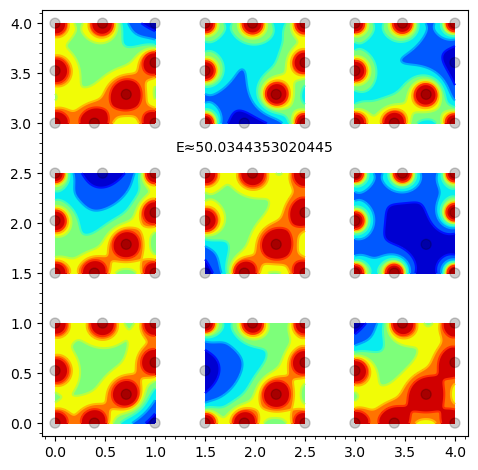

In [23]:
t(1.0, 0.0, 0.0, 0.5245332501916478, 0.0, 1.0, 0.47546817423114146, 1.0, 0.0, 0.0, 0.7120324038136344, 0.28796595398570346, 1.0, 1.0, 0.3936501287143338, 0.0, 1.0, 0.6063469460093688)

And another local minimum

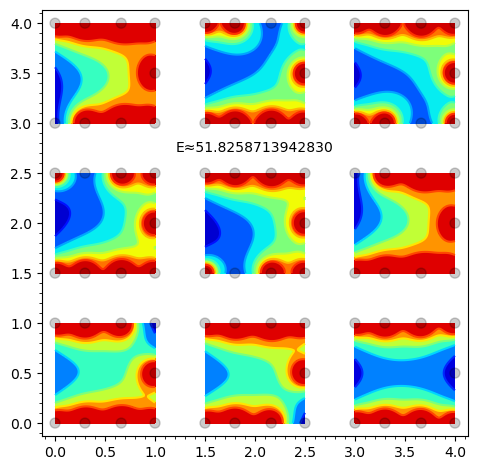

In [24]:
t(1.0, 1.0, 1.0, 0.0, 1.0, 0.499999629244239, 0.2992930336270613, 1.0, 0.2992927968254498, 0.0, 0.0, 1.0, 0.0, 0.0, 0.6619013335361849, 1.0, 0.6619009602856978, 0.0)